In [1]:
import pandas as pd
import numpy as np

# REVIEWS

### Unlabelled dataset

In [9]:
full_df = pd.read_csv('../data/REVIEWS-raw/6_arg_extraction_t_prediction_t_confidence-2.csv')
full_df['id'] = full_df.conference + full_df.paper_id.astype(str) +\
    '_' + full_df.review_id.astype(str) + '_' + full_df.sentence_id.astype(str)
full_df['annotation'] = 'UNL'
full_df = full_df[['id', 'sentence', 'annotation']]
full_df['topic'] = ''

In [10]:
full_df

,id,sentence,annotation,topic
0,graph201_1_0,"""I have reviewed this paper earlier as a SIGGR...",UNL,
1,graph201_1_1,The paper presents a novel method based on dee...,UNL,
2,graph201_1_2,"As a representation for the 3D shape, the auth...",UNL,
3,graph201_1_3,The model has been trained on a tiny dataset (...,UNL,
4,graph201_1_4,The architecture of the network is based on an...,UNL,
...,...,...,...,...
257811,iclr202213_3_14,Your grammar is backwards.,UNL,
257812,iclr202213_3_15,"The question you are trying to express is ""bia...",UNL,
257813,iclr202213_3_16,"So heading should be ""to what inside the envir...",UNL,
257814,iclr202213_3_17,"--> idk that this is that surprising, it was k...",UNL,


In [11]:
full_df[['id', 'annotation', 'sentence', 'topic']].to_csv('../data/REVIEWS-clean/in-topic/unlabelled.tsv', sep='\t', index=False)


### Labelled dataset

In [3]:
labelled_df = pd.read_csv('../data/REVIEWS-raw/sentences_just_one_position.csv', header=None, 
                          names=['id', 'sentence', 'annotation'], sep='\t')
label_dict = {
    ' NEG': 'Argument_against',
    ' POS': 'Argument_for',
    ' NA': 'NoArgument'
}
labelled_df['topic'] = ''
labelled_df['annotation'] = labelled_df['annotation'].map(lambda x: label_dict[x])

In [82]:
# Non-overlap check
pd.merge(full_df, labelled_df, on='id')

,id,sentence_x,annotation_x,topic_x,sentence_y,annotation_y,topic_y


In [83]:
labelled_df.annotation.value_counts()

Argument_against    640
NoArgument          558
Argument_for        203
Name: annotation, dtype: int64

In [84]:
train_df, val_df, test_df = np.split(labelled_df.sample(frac=1, random_state=42), 
                                     [int(.6*len(labelled_df)), int(.8*len(labelled_df))])

In [85]:
len(train_df), len(val_df), len(test_df)

(840, 280, 281)

In [86]:
len(train_df)/len(labelled_df), len(val_df)/len(labelled_df), len(test_df)/len(labelled_df)

(0.5995717344753747, 0.1998572448251249, 0.20057102069950036)

In [87]:
train_df[['annotation', 'sentence', 'topic']].to_csv('../data/REVIEWS-clean/in-topic/train.tsv', sep='\t', index=False)
val_df[['annotation', 'sentence', 'topic']].to_csv('../data/REVIEWS-clean/in-topic/val.tsv', sep='\t', index=False)
test_df[['annotation', 'sentence', 'topic']].to_csv('../data/REVIEWS-clean/in-topic/test.tsv', sep='\t', index=False)

## Existing data split

In [12]:
import pandas as pd

train_df = pd.read_csv('../data/REVIEWS-raw/5_model_works_sentence_level_train_valid_test_train.csv', 
                      names=['id', 'sentence', 'annotation'], sep='\t', skiprows=1)

val_df = pd.read_csv('../data/REVIEWS-raw/5_model_works_sentence_level_train_valid_test_val.csv', 
                      names=['id', 'sentence', 'annotation'], sep='\t', skiprows=1)

test_df = pd.read_csv('../data/REVIEWS-raw/5_model_works_sentence_level_train_valid_test_test.csv', 
                      names=['id', 'sentence', 'annotation'], sep='\t', skiprows=1)

train_df['topic'] = ''
val_df['topic'] = ''
test_df['topic'] = ''

label_dict = {
    ' NEG': 'Argument_against',
    ' POS': 'Argument_for',
    ' NA': 'NoArgument'
}

train_df['annotation'] = train_df['annotation'].map(lambda x: label_dict[x])
val_df['annotation'] = val_df['annotation'].map(lambda x: label_dict[x])
test_df['annotation'] = test_df['annotation'].map(lambda x: label_dict[x])

In [13]:
train_df

,id,sentence,annotation,topic
379,iclr19_261_3_17,You should link to this literature (mostly in...,Argument_against,
976,midl19_51_2_16,5- Obtaining quantitative comparison results ...,Argument_against,
374,iclr19_261_3_11,Please provide variance measures on your resu...,Argument_against,
1208,midl20_96_3_19,I am advising regulatory decision makers and ...,NoArgument,
541,iclr20_1042_2_19,"Similarly, the proposed rejection sampling sc...",Argument_against,
...,...,...,...,...
211,graph20_56_1_18,These critical areas of confusion around how ...,Argument_against,
502,iclr19_938_3_7,The centralized nature is also semantically i...,Argument_against,
537,iclr20_1042_2_15,A Weibull distribution is used to model the s...,NoArgument,
1220,neuroai19_2_2_10,There may be much interest in how we learn fr...,NoArgument,


In [14]:
train_df[['id', 'annotation', 'sentence', 'topic']].to_csv('../data/REVIEWS-clean/in-topic/train.tsv', sep='\t', index=False)
val_df[['id', 'annotation', 'sentence', 'topic']].to_csv('../data/REVIEWS-clean/in-topic/val.tsv', sep='\t', index=False)
test_df[['id', 'annotation', 'sentence', 'topic']].to_csv('../data/REVIEWS-clean/in-topic/test.tsv', sep='\t', index=False)

# IMDB

In [9]:
train_full_df = pd.read_csv('../data/IMDB-raw/csv/train.csv', names=['sentence', 'annotation', 'id'], sep='\t', skiprows=1)
test_df = pd.read_csv('../data/IMDB-raw/csv/test.csv', names=['sentence', 'annotation', 'id'], sep='\t', skiprows=1)

train_full_df['topic'] = ''
test_df['topic'] = ''

# val_df = test_df.copy()

In [11]:
# Labelled/unlabelled split
unlab_df = train_full_df[train_full_df.annotation == 'unsup']
train_df = train_full_df[train_full_df.annotation != 'unsup']

annotations = train_df.annotation.unique()
n_labels = 20
n_labels_per_annotation_train = n_labels // len(annotations)
n_labels_per_annotation_val = 50

len(train_df)

25000

In [12]:
train_short_df = train_df.groupby('annotation').sample(n_labels_per_annotation_train, random_state=42)
unlab_val_df = train_df[~train_df.id.isin(train_short_df.id)]
val_df = unlab_val_df.groupby('annotation').sample(n_labels_per_annotation_val, random_state=42)
unlab_extra_df = unlab_val_df[~unlab_val_df.id.isin(val_df.id)]

unlab_full_df = pd.concat([unlab_df, unlab_extra_df])

unlab_full_df.loc[:, 'annotation'] = 'UNL'

train_short_df

,sentence,annotation,id,topic
1766,"America needs the best man possible to win ""Th...",neg,neg_6135_2.txt,
11919,Race car drivers say that 100 mph seems fast t...,neg,neg_7076_3.txt,
8909,I'll have to add dissenting comment here. Vari...,neg,neg_8885_3.txt,
4963,This is truly an awful movie and a waste of 2 ...,neg,neg_7037_1.txt,
10099,Well well well. As good as John Carpenter's se...,neg,neg_6064_3.txt,
2754,Any movie that has nude scenes of Karen Allen ...,neg,neg_4499_1.txt,
2858,"Live! Yes, but not kicking. True story: Some ...",neg,neg_831_2.txt,
5568,After reading all of the rave reviews about th...,neg,neg_8344_4.txt,
11673,The only thing that kept me from vomiting afte...,neg,neg_2270_1.txt,
5778,Whatever rating I give BOOM is only because of...,neg,neg_9634_4.txt,


In [13]:
val_df

,sentence,annotation,id,topic
10113,John Pressman (Micheal 'I shoulda called Ditec...,neg,neg_12011_4.txt,
4670,This is a candidate for the single most disapp...,neg,neg_2383_1.txt,
7529,This film about secret government mind experim...,neg,neg_1396_2.txt,
7426,This film is a huge steaming pile. I have no...,neg,neg_2248_1.txt,
11200,This little show is obviously some stupid litt...,neg,neg_7623_4.txt,
...,...,...,...,...
15743,I gave it an 8 star rating. The story may have...,pos,pos_6397_8.txt,
23571,This film illustrates the worst part of surviv...,pos,pos_3427_8.txt,
20664,I've never seen many online movies in most of ...,pos,pos_3747_10.txt,
22299,The part where Meg visits the mechanic and he ...,pos,pos_8332_9.txt,


In [14]:
len(train_short_df), len(unlab_full_df), len(val_df), len(test_df)

(20, 74880, 100, 25000)

In [15]:
train_short_df[['id', 'annotation', 'sentence', 'topic']].to_csv('../data/IMDB-clean/train.tsv', sep='\t', index=False)
unlab_full_df[['id', 'annotation', 'sentence', 'topic']].to_csv('../data/IMDB-clean/unlabelled.tsv', sep='\t', index=False)
val_df[['id', 'annotation', 'sentence', 'topic']].to_csv('../data/IMDB-clean/val.tsv', sep='\t', index=False)
test_df[['id', 'annotation', 'sentence', 'topic']].to_csv('../data/IMDB-clean/test.tsv', sep='\t', index=False)

# YELP-2 / YELP-5

In [30]:
full_df = pd.read_json('../data/YELP-raw/yelp_academic_dataset_review.json', 
                      lines=True,
                      dtype={'review_id':str,'user_id':str,
                             'business_id':str,'stars':int,
                             'date':str,'text':str,'useful':int,
                             'funny':int,'cool':int},)
full_df['topic'] = ''

In [31]:
full_df = full_df[['review_id', 'text', 'stars', 'topic']].rename(columns={'review_id': 'id', 
                                                                  'text':'sentence', 
                                                                  'stars': 'annotation'})

<AxesSubplot:>

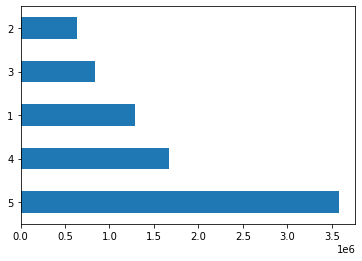

In [32]:
full_df.annotation.value_counts().plot.barh()

In [33]:
full_df

,id,sentence,annotation,topic
0,xQY8N_XvtGbearJ5X4QryQ,"As someone who has worked with many museums, I...",2,
1,UmFMZ8PyXZTY2QcwzsfQYA,I am actually horrified this place is still in...,1,
2,LG2ZaYiOgpr2DK_90pYjNw,I love Deagan's. I do. I really do. The atmosp...,5,
3,i6g_oA9Yf9Y31qt0wibXpw,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",1,
4,6TdNDKywdbjoTkizeMce8A,"Oh happy day, finally have a Canes near my cas...",4,
...,...,...,...,...
8021117,LAzw2u1ucY722ryLEXHdgg,"Fricken unbelievable, I ordered 2 space heater...",1,
8021118,gMDU14Fa_DVIcPvsKtubJA,Solid American food with a southern comfort fl...,3,
8021119,EcY_p50zPIQ2R6rf6-5CjA,I'm honestly not sure how I have never been to...,5,
8021120,-z_MM0pAf9RtZbyPlphTlA,Food was decent but I will say the service too...,3,


In [34]:
# YELP-5 setup 
annotations = full_df.annotation.unique()

n_labels = 2500
n_labels_per_annotation_train = n_labels // len(annotations)
n_labels_per_annotation_val = 250
n_labels_per_annotation_test = 10000

In [35]:
n_labels_per_annotation_train

500

In [36]:
train_df = full_df.groupby('annotation').sample(n_labels_per_annotation_train, random_state=42)
unlab_val_test_df = full_df[~full_df.id.isin(train_df.id)]
train_df

,id,sentence,annotation,topic
7812276,WSme0V2JMAvpDCxwXwFyXA,I have worked with Peter at Green Arrow for a...,1,
6956890,ziBkgCPfWhuHU8YeyeLM_Q,Worst salon ever!!!! They make an appointment ...,1,
1607651,EwayY1QNFGjKjt4ksC9sMA,could be happenin' if anybody showed up. pitt...,1,
2278082,V15VNurKdFNDkiDt-ImKaQ,"Yeah, so nothing has changed with their servic...",1,
879267,YuzuZQX9ywDfd5mekgEWqQ,I sent a parts request through their online em...,1,
...,...,...,...,...
6943699,TU_h0vWQeCc1rvbrO3FWcw,10 cent tacos on Thursdays. These prices seem ...,5,
2779972,dLW6rDRb89zO6fCvlu0maA,I don't understand the less than great reviews...,5,
5986922,waQLmpywUnRu0MS01j0nsA,Apple could learn a thing or two from this pla...,5,
4433237,2-pbV4mM4h4IfcDyN6kPdw,This was the first time I had Ethiopian food a...,5,


In [37]:
test_df = unlab_val_test_df.groupby('annotation').sample(n_labels_per_annotation_test, random_state=42)
unlab_val_df = unlab_val_test_df[~unlab_val_test_df.id.isin(test_df.id)]
test_df

,id,sentence,annotation,topic
7096777,-lB6CMsZjwv6urkJDY_V5w,If anyone is going here looking for a vegan or...,1,
2094413,cEZQ2Vgq_Rv8EjxzY4bQcg,Also doing business as Panda Home Solutions. ...,1,
3619473,0hTaYiFJT0nCAmZYIEPKdw,I typically LOVE Cafe Rio... I have eaten at ...,1,
2013745,SadBhxfLWOtLwMesfKo1-w,Staff very busy playing around with each other...,1,
2889226,Blf92sZ7eBbetZmqwTRC5A,10/26/2018 Food was good and service was okay ...,1,
...,...,...,...,...
1851395,CUkK3FdwcfWw20rMs4UVZg,If you don't wanna wait in the big queues then...,5,
5262065,niEOeTzqNb41Plv9q9BG_w,The Staff is awesome and always friendly. Go f...,5,
6168954,CnKlleAgYtyoPkMioWJIzQ,My favorite necklace broke a few years ago and...,5,
366670,5sW6zDyIYXGlR46q7iBkrw,We had a great experience when we bought a RAV...,5,


In [38]:
val_df = unlab_val_df.groupby('annotation').sample(n_labels_per_annotation_val, random_state=42)
unlab_df = unlab_val_df[~unlab_val_df.id.isin(val_df.id)]
unlab_df['annotation'] = 'UNL'
val_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,sentence,annotation,topic
6131028,PZ8hzWyV9F8qMoyZHLe3mA,Not honest people.. they will tell you 3 hour ...,1,
6023769,EsE91R4cx3MpyMN79GcptA,Sorry - I had a mediocre experience my first t...,1,
2291640,VsToNhgO7awPIwRIr2u5gA,This used to be one of my favorite experiences...,1,
7080322,glWBr3iBxQ2wZRAL_tgZkA,World's Worst Customer Service. I paid $50 ext...,1,
4668348,EB2YkLmpuBoT8iAOTa5jhQ,Port Authority of Allegheny County are the wor...,1,
...,...,...,...,...
2430093,f9_ZXGL4hLibSNp011hJ1w,"In a word, WOW! Nourish is fantastic - health...",5,
3446242,_IoLZmaHM5jZ3hBGYdxvXA,Hazelnut Mocha with or without Chocolate is AM...,5,
7608914,dZ91pm_X-EpRxvPJtba9xQ,Ordered the Group of 7 and BC for pick up. Ser...,5,
756449,Hjmi7j_Qsp8eRvmikT6iKA,Excellent experience. We're from out of state ...,5,


In [39]:
unlab_df

,id,sentence,annotation,topic
0,xQY8N_XvtGbearJ5X4QryQ,"As someone who has worked with many museums, I...",UNL,
1,UmFMZ8PyXZTY2QcwzsfQYA,I am actually horrified this place is still in...,UNL,
2,LG2ZaYiOgpr2DK_90pYjNw,I love Deagan's. I do. I really do. The atmosp...,UNL,
3,i6g_oA9Yf9Y31qt0wibXpw,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",UNL,
4,6TdNDKywdbjoTkizeMce8A,"Oh happy day, finally have a Canes near my cas...",UNL,
...,...,...,...,...
8021117,LAzw2u1ucY722ryLEXHdgg,"Fricken unbelievable, I ordered 2 space heater...",UNL,
8021118,gMDU14Fa_DVIcPvsKtubJA,Solid American food with a southern comfort fl...,UNL,
8021119,EcY_p50zPIQ2R6rf6-5CjA,I'm honestly not sure how I have never been to...,UNL,
8021120,-z_MM0pAf9RtZbyPlphTlA,Food was decent but I will say the service too...,UNL,


In [40]:
len(train_df), len(unlab_df), len(val_df), len(test_df)

(2500, 7967372, 1250, 50000)

In [41]:
len(full_df) == sum((len(train_df), len(unlab_df), len(val_df), len(test_df)))

True

In [43]:
train_df[['id', 'annotation', 'sentence', 'topic']].to_csv('../data/YELP-clean/train.tsv', sep='\t', index=False)
unlab_df[['id', 'annotation', 'sentence', 'topic']].to_csv('../data/YELP-clean/unlabelled.tsv', sep='\t', index=False)
val_df[['id', 'annotation', 'sentence', 'topic']].to_csv('../data/YELP-clean/val.tsv', sep='\t', index=False)
test_df[['id', 'annotation', 'sentence', 'topic']].to_csv('../data/YELP-clean/test.tsv', sep='\t', index=False)